# Time-Series Forecasting: Predicting Stock Prices Using An LSTM Model
## 참조 : https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping



Bad key "text.kerning_factor" on line 4 in
C:\Users\fu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Using TensorFlow backend.


In [3]:
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [4]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [7]:
print(training_set)

[[52.444   ]
 [52.450001]
 [52.419998]
 [53.348   ]
 [52.844002]
 [54.5     ]
 [55.      ]
 [54.009998]
 [52.254002]
 [53.93    ]
 [53.476002]
 [52.486   ]
 [51.150002]
 [52.854   ]
 [52.537998]
 [53.52    ]
 [53.257999]
 [52.001999]
 [52.716   ]
 [49.908001]
 [48.716   ]
 [47.630001]
 [47.43    ]
 [47.      ]
 [47.972   ]
 [49.448002]
 [51.112   ]
 [51.076   ]
 [52.066002]
 [50.411999]
 [47.200001]
 [40.557999]
 [46.104   ]
 [45.585999]
 [46.200001]
 [48.372002]
 [49.124001]
 [48.068001]
 [49.060001]
 [50.411999]
 [48.178001]
 [49.009998]
 [50.41    ]
 [49.445999]
 [49.528   ]
 [50.220001]
 [50.549999]
 [50.608002]
 [52.792   ]
 [51.591999]
 [52.796001]
 [51.806   ]
 [52.389999]
 [51.905998]
 [53.321999]
 [51.470001]
 [50.091999]
 [50.400002]
 [49.501999]
 [47.119999]
 [49.768002]
 [48.      ]
 [47.326   ]
 [46.015999]
 [44.186001]
 [44.598   ]
 [42.655998]
 [44.133999]
 [43.285999]
 [44.608002]
 [45.299999]
 [45.543999]
 [42.397999]
 [42.312   ]
 [43.      ]
 [42.276001]
 [42.967999]

In [8]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [ ]:
"""
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-50:i, 0])
    y_train.append(training_set_scaled[i, 0])
"""

In [9]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





740/740 [==============================] - 6s 8ms/step - loss: 0.0784
Epoch 2/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0199
Epoch 3/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0131
Epoch 4/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0129
Epoch 5/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0113
Epoch 6/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0114
Epoch 7/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0116
Epoch 8/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0100
Epoch 9/100
740/740 [==============================] - 3s 4ms/step - loss: 0.0102
Epoch 10/100
740/740 [==================

In [10]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

"""
X_test = []
y_test = []
for i in range(60, 519):
    X_test.append(inputs[i-50:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
"""


"""
But if we have 1 day lag with the code line [`i-60:i, 0`], 
so we can have 1 day forward with the code line [`i-50:i, 0`] or [`i-40:i, 0`]. Am I right?
"""

"""
이것은 또한 루프에 따라 다릅니다. 예를 들어 'for i in range (60, 800) :
X_train.append (training_set_scaled [i-60 : i, 0])'가있는 경우 첫 번째 반복은 데이터 0:60을 사용하고 
두 번째 반복은 데이터 1:61을 사용합니다. 따라서이 경우 단계는 실제로 1 (시간 지연)입니다.
"""

(459, 60, 1)


"\n이것은 또한 루프에 따라 다릅니다. 예를 들어 'for i in range (60, 800) :\nX_train.append (training_set_scaled [i-60 : i, 0])'가있는 경우 첫 번째 반복은 데이터 0:60을 사용하고 \n두 번째 반복은 데이터 1:61을 사용합니다. 따라서이 경우 단계는 실제로 1 (시간 지연)입니다.\n"

In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

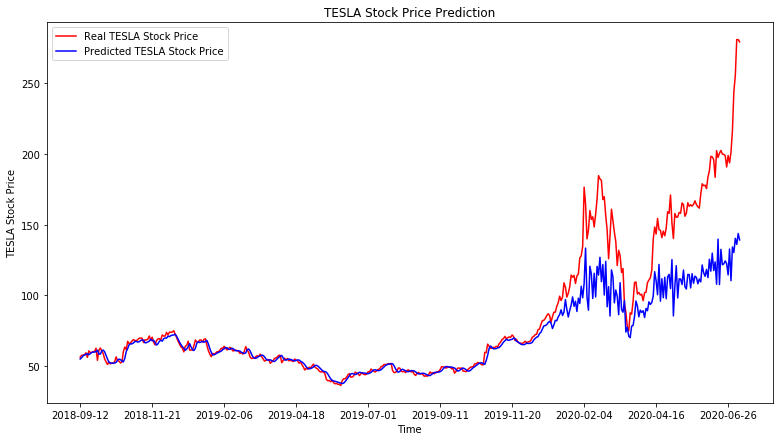

In [18]:
# Visualising the results

plt.figure(figsize=(13, 7))
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [19]:
# 미래예측시에는 다음을 참조
# https://datascience.stackexchange.com/questions/30762/how-to-predict-the-future-values-of-time-horizon-with-keras